# Credit Card Customers Segmentation

## A project with an aim to practice the K-means algorithm

The dataset contains information about the company’s clients and we're asked to help segment them into different groups in order to apply different business strategies for each type of customer.

Data dictionary:
* customer_id: unique identifier for each customer.
* age: customer age in years.
* gender: customer gender (M or F).
* dependent_count: number of dependents of each customer.
* education_level: level of education ("High School", "Graduate", etc.).
* marital_status: marital status ("Single", "Married", etc.).
* estimated_income: the estimated income for the customer projected by the data science team.
* months_on_book: time as a customer in months.
* total_relationship_count: number of times the customer contacted the company.
* months_inactive_12_mon: number of months the customer did not use the credit card in the last 12 months.
* credit_limit: customer's credit limit.
* total_trans_amount: the overall amount of money spent on the card by the customer.
* total_trans_count: the overall number of times the customer used the card.
* avg_utilization_ratio: daily average utilization ratio.

## Exploring the Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('customer_segmentation.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10127 non-null  int64  
 1   age                       10127 non-null  int64  
 2   gender                    10127 non-null  object 
 3   dependent_count           10127 non-null  int64  
 4   education_level           10127 non-null  object 
 5   marital_status            10127 non-null  object 
 6   estimated_income          10127 non-null  int64  
 7   months_on_book            10127 non-null  int64  
 8   total_relationship_count  10127 non-null  int64  
 9   months_inactive_12_mon    10127 non-null  int64  
 10  credit_limit              10127 non-null  float64
 11  total_trans_amount        10127 non-null  int64  
 12  total_trans_count         10127 non-null  int64  
 13  avg_utilization_ratio     10127 non-null  float64
dtypes: flo

In [4]:
df.head()

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,768805383,45,M,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061
1,818770008,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105
2,713982108,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000
3,769911858,40,F,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760
4,709106358,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000


There are no missing values

Categorical variables are:
* gender
* education_level
* marital_status

In [5]:
corr =round(df.drop('customer_id', axis=1).corr(), 2)
corr

C:\Users\Olga\AppData\Local\Temp\ipykernel_11900\696911222.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr =round(df.drop('customer_id', axis=1).corr(), 2)


,age,dependent_count,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
age,1.00,-0.12,0.03,0.79,-0.01,0.05,0.00,-0.05,-0.07,0.01
dependent_count,-0.12,1.00,0.05,-0.10,-0.04,-0.01,0.07,0.03,0.05,-0.04
estimated_income,0.03,0.05,1.00,0.03,-0.01,-0.00,0.52,0.02,-0.04,-0.28
months_on_book,0.79,-0.10,0.03,1.00,-0.01,0.07,0.01,-0.04,-0.05,-0.01
total_relationship_count,-0.01,-0.04,-0.01,-0.01,1.00,-0.00,-0.07,-0.35,-0.24,0.07
months_inactive_12_mon,0.05,-0.01,-0.00,0.07,-0.00,1.00,-0.02,-0.04,-0.04,-0.01
credit_limit,0.00,0.07,0.52,0.01,-0.07,-0.02,1.00,0.17,0.08,-0.48
total_trans_amount,-0.05,0.03,0.02,-0.04,-0.35,-0.04,0.17,1.00,0.81,-0.08
total_trans_count,-0.07,0.05,-0.04,-0.05,-0.24,-0.04,0.08,0.81,1.00,0.00
avg_utilization_ratio,0.01,-0.04,-0.28,-0.01,0.07,-0.01,-0.48,-0.08,0.00,1.00


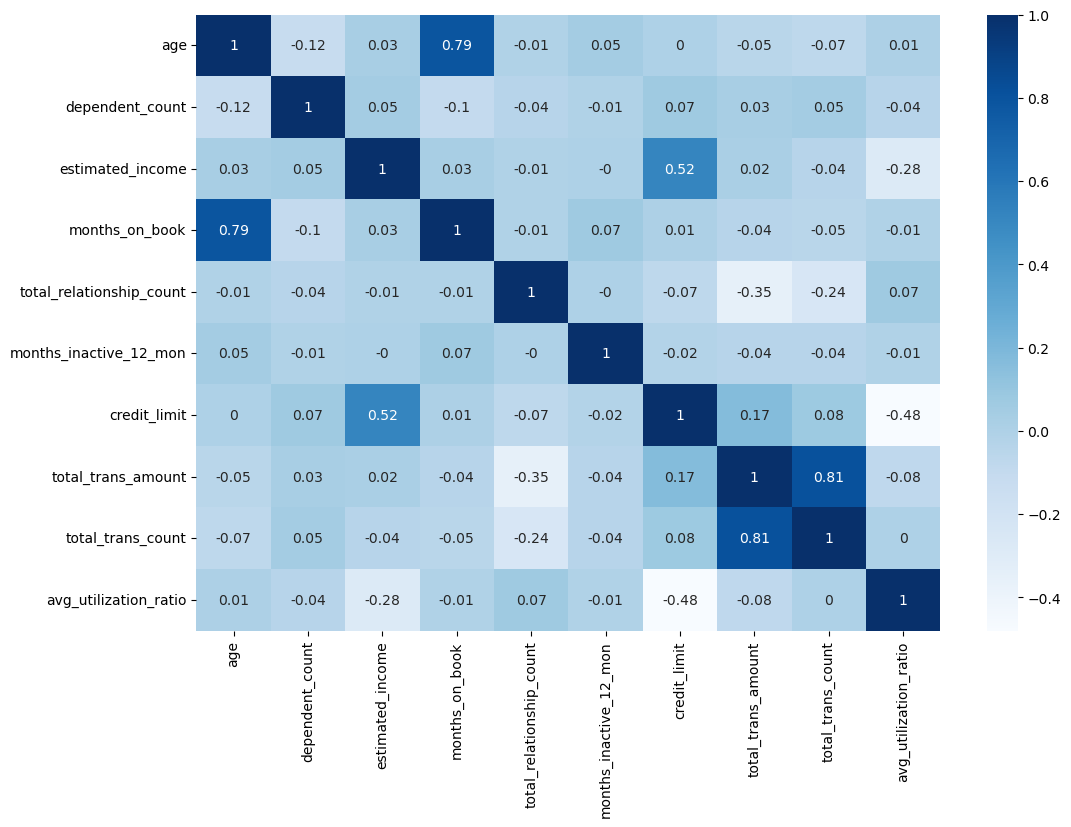

In [6]:
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap='Blues', annot=True)
plt.show()

Most of the variables present weak correlations between each other, but there are some we can highlight:

* Age is strongly correlated with how long the person has been a customer (months_on_book);
* Credit limit is positively correlated with the estimated income and negatively correlated with the average utilization ratio;
* The total number of transactions (total_trans_count) is strongly correlated with the total amount transitioned (total_trans_amount).

In [7]:
df.columns

Index(['customer_id', 'age', 'gender', 'dependent_count', 'education_level',
       'marital_status', 'estimated_income', 'months_on_book',
       'total_relationship_count', 'months_inactive_12_mon', 'credit_limit',
       'total_trans_amount', 'total_trans_count', 'avg_utilization_ratio'],
      dtype='object')

C:\Users\Olga\AppData\Local\Temp\ipykernel_11900\2604601519.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df[numeric_cols].hist(ax=ax)


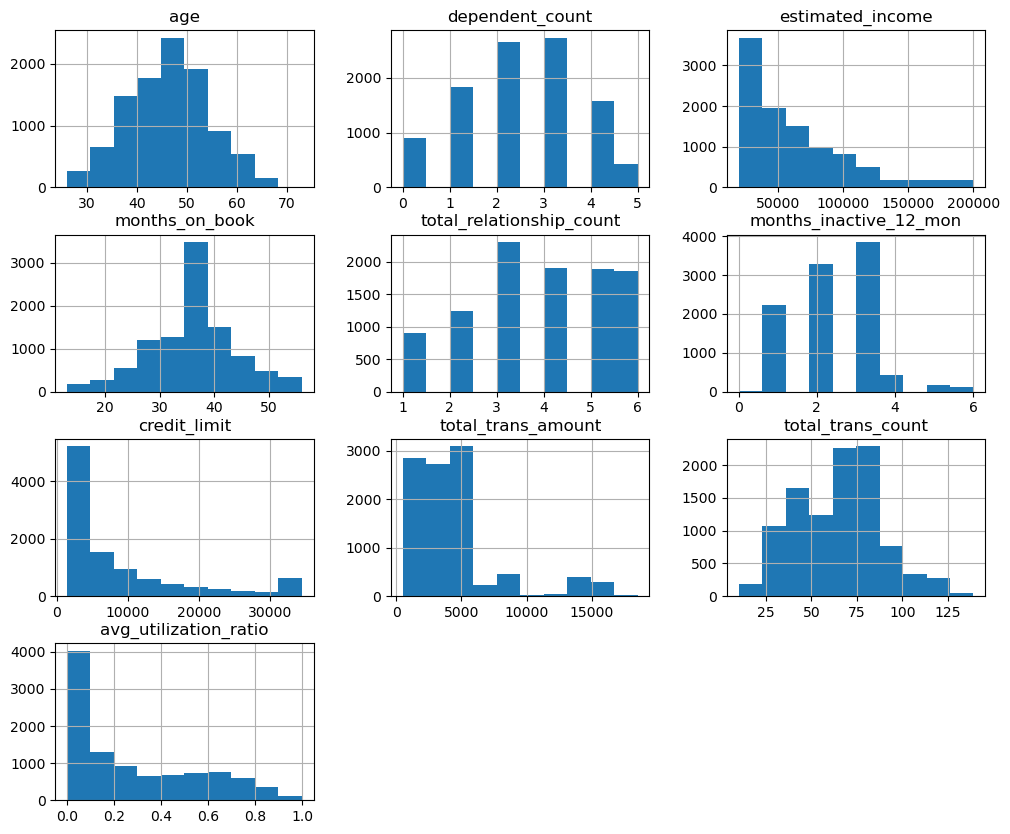

In [8]:
numeric_cols = ['age', 'dependent_count', 'estimated_income', 'months_on_book',
       'total_relationship_count', 'months_inactive_12_mon', 'credit_limit',
       'total_trans_amount', 'total_trans_count', 'avg_utilization_ratio']

fig, ax = plt.subplots(figsize=(12, 10))
df[numeric_cols].hist(ax=ax)
plt.show()

## Feature Engineering

Firstly we will deal with categorical columns.

In [9]:
df_modif = df.copy()

In [10]:
df_modif['gender'].value_counts()

F    5358
M    4769
Name: gender, dtype: int64

In [11]:
df_modif['gender'] = df_modif['gender'].map(lambda x: 0 if x=='F' else 1).astype("int32")
df_modif['gender'].value_counts()

0    5358
1    4769
Name: gender, dtype: int64

In [12]:
df_modif['education_level'].value_counts()

Graduate         3685
High School      2351
Uneducated       1755
College          1192
Post-Graduate     616
Doctorate         528
Name: education_level, dtype: int64

In [13]:
df_modif['education_level'] = df_modif['education_level'].replace(['Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate'],
                                                                  [0, 1, 2, 3, 4, 5]).astype('int32')
df_modif['education_level'].value_counts()

3    3685
1    2351
0    1755
2    1192
4     616
5     528
Name: education_level, dtype: int64

In [14]:
df_modif['marital_status'].value_counts()

Married     4687
Single      3943
Unknown      749
Divorced     748
Name: marital_status, dtype: int64

In [15]:
df_modif = pd.get_dummies(df_modif, drop_first=True)
df_modif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10127 non-null  int64  
 1   age                       10127 non-null  int64  
 2   gender                    10127 non-null  int32  
 3   dependent_count           10127 non-null  int64  
 4   education_level           10127 non-null  int32  
 5   estimated_income          10127 non-null  int64  
 6   months_on_book            10127 non-null  int64  
 7   total_relationship_count  10127 non-null  int64  
 8   months_inactive_12_mon    10127 non-null  int64  
 9   credit_limit              10127 non-null  float64
 10  total_trans_amount        10127 non-null  int64  
 11  total_trans_count         10127 non-null  int64  
 12  avg_utilization_ratio     10127 non-null  float64
 13  marital_status_Married    10127 non-null  uint8  
 14  marita

## Scaling the Data

In [16]:
df_modif2 = df_modif.drop('customer_id', axis=1).copy()

In [17]:
scaler = StandardScaler()

In [18]:
scaler.fit(df_modif2)

StandardScaler()

In [19]:
df_scaled_array = scaler.transform(df_modif2)
df_scaled_array

array([[-0.16540558,  1.05995565,  0.50336813, ...,  1.07733799,
        -0.79850685, -0.28260887],
       [ 0.33357038, -0.9434357 ,  2.04319867, ..., -0.92821381,
         1.2523374 , -0.28260887],
       [ 0.58305837,  1.05995565,  0.50336813, ...,  1.07733799,
        -0.79850685, -0.28260887],
       ...,
       [-0.29014957, -0.9434357 , -1.03646242, ...,  1.07733799,
        -0.79850685, -0.28260887],
       [-2.03656544,  1.05995565, -0.26654715, ..., -0.92821381,
        -0.79850685,  3.53845931],
       [-0.41489356, -0.9434357 , -0.26654715, ...,  1.07733799,
        -0.79850685, -0.28260887]])

In [20]:
df_scaled = pd.DataFrame(df_scaled_array, columns = df_modif2.columns)
df_scaled.head()

,age,gender,dependent_count,education_level,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,marital_status_Married,marital_status_Single,marital_status_Unknown
0,-0.165406,1.059956,0.503368,-0.752211,0.175810,0.384621,0.763943,-1.327136,0.446622,-0.959707,-0.973895,-0.775882,1.077338,-0.798507,-0.282609
1,0.333570,-0.943436,2.043199,0.662787,-0.967166,1.010715,1.407306,-1.327136,-0.041367,-0.916433,-1.357340,-0.616276,-0.928214,1.252337,-0.282609
2,0.583058,1.059956,0.503368,0.662787,0.785397,0.008965,0.120579,-1.327136,-0.573698,-0.740982,-1.911206,-0.997155,1.077338,-0.798507,-0.282609
3,-0.789126,-0.943436,1.273283,-0.752211,-0.636973,-0.241473,-0.522785,1.641478,-0.585251,-0.951758,-1.911206,1.759686,-0.928214,-0.798507,3.538459
4,-0.789126,1.059956,0.503368,-1.459710,0.074212,-1.869317,0.763943,-1.327136,-0.430877,-1.056263,-1.570365,-0.997155,1.077338,-0.798507,-0.282609


## Choosing K

In [21]:
inertias = []

In [22]:
for k in range(1,11):
    model = KMeans(n_clusters=k, n_init=10)
    model.fit_predict(df_scaled)
    inertias.append(model.inertia_)

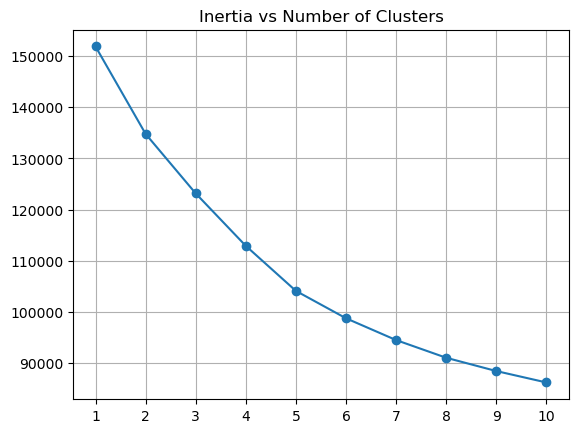

In [23]:
plt.plot(range(1,11), inertias, marker='o')
plt.xticks(ticks=range(1,11), labels=range(1,11))
plt.title('Inertia vs Number of Clusters')
plt.grid()
plt.show()

We can select K between 5 and 7

In [24]:
k = 6
model = KMeans(n_clusters=k, n_init=10)
clusters = model.fit_predict(df_scaled)
clusters

array([4, 0, 4, ..., 2, 5, 2])

## Analyzing Results

In [25]:
dfc = df.copy()
dfc['clusters'] = clusters+1

In [26]:
dfc.head()

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,clusters
0,768805383,45,M,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061,5
1,818770008,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105,1
2,713982108,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000,5
3,769911858,40,F,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760,6
4,709106358,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000,3


In [27]:
dfc['clusters'].value_counts()

3    2789
1    2491
5    1759
2    1448
4     910
6     730
Name: clusters, dtype: int64

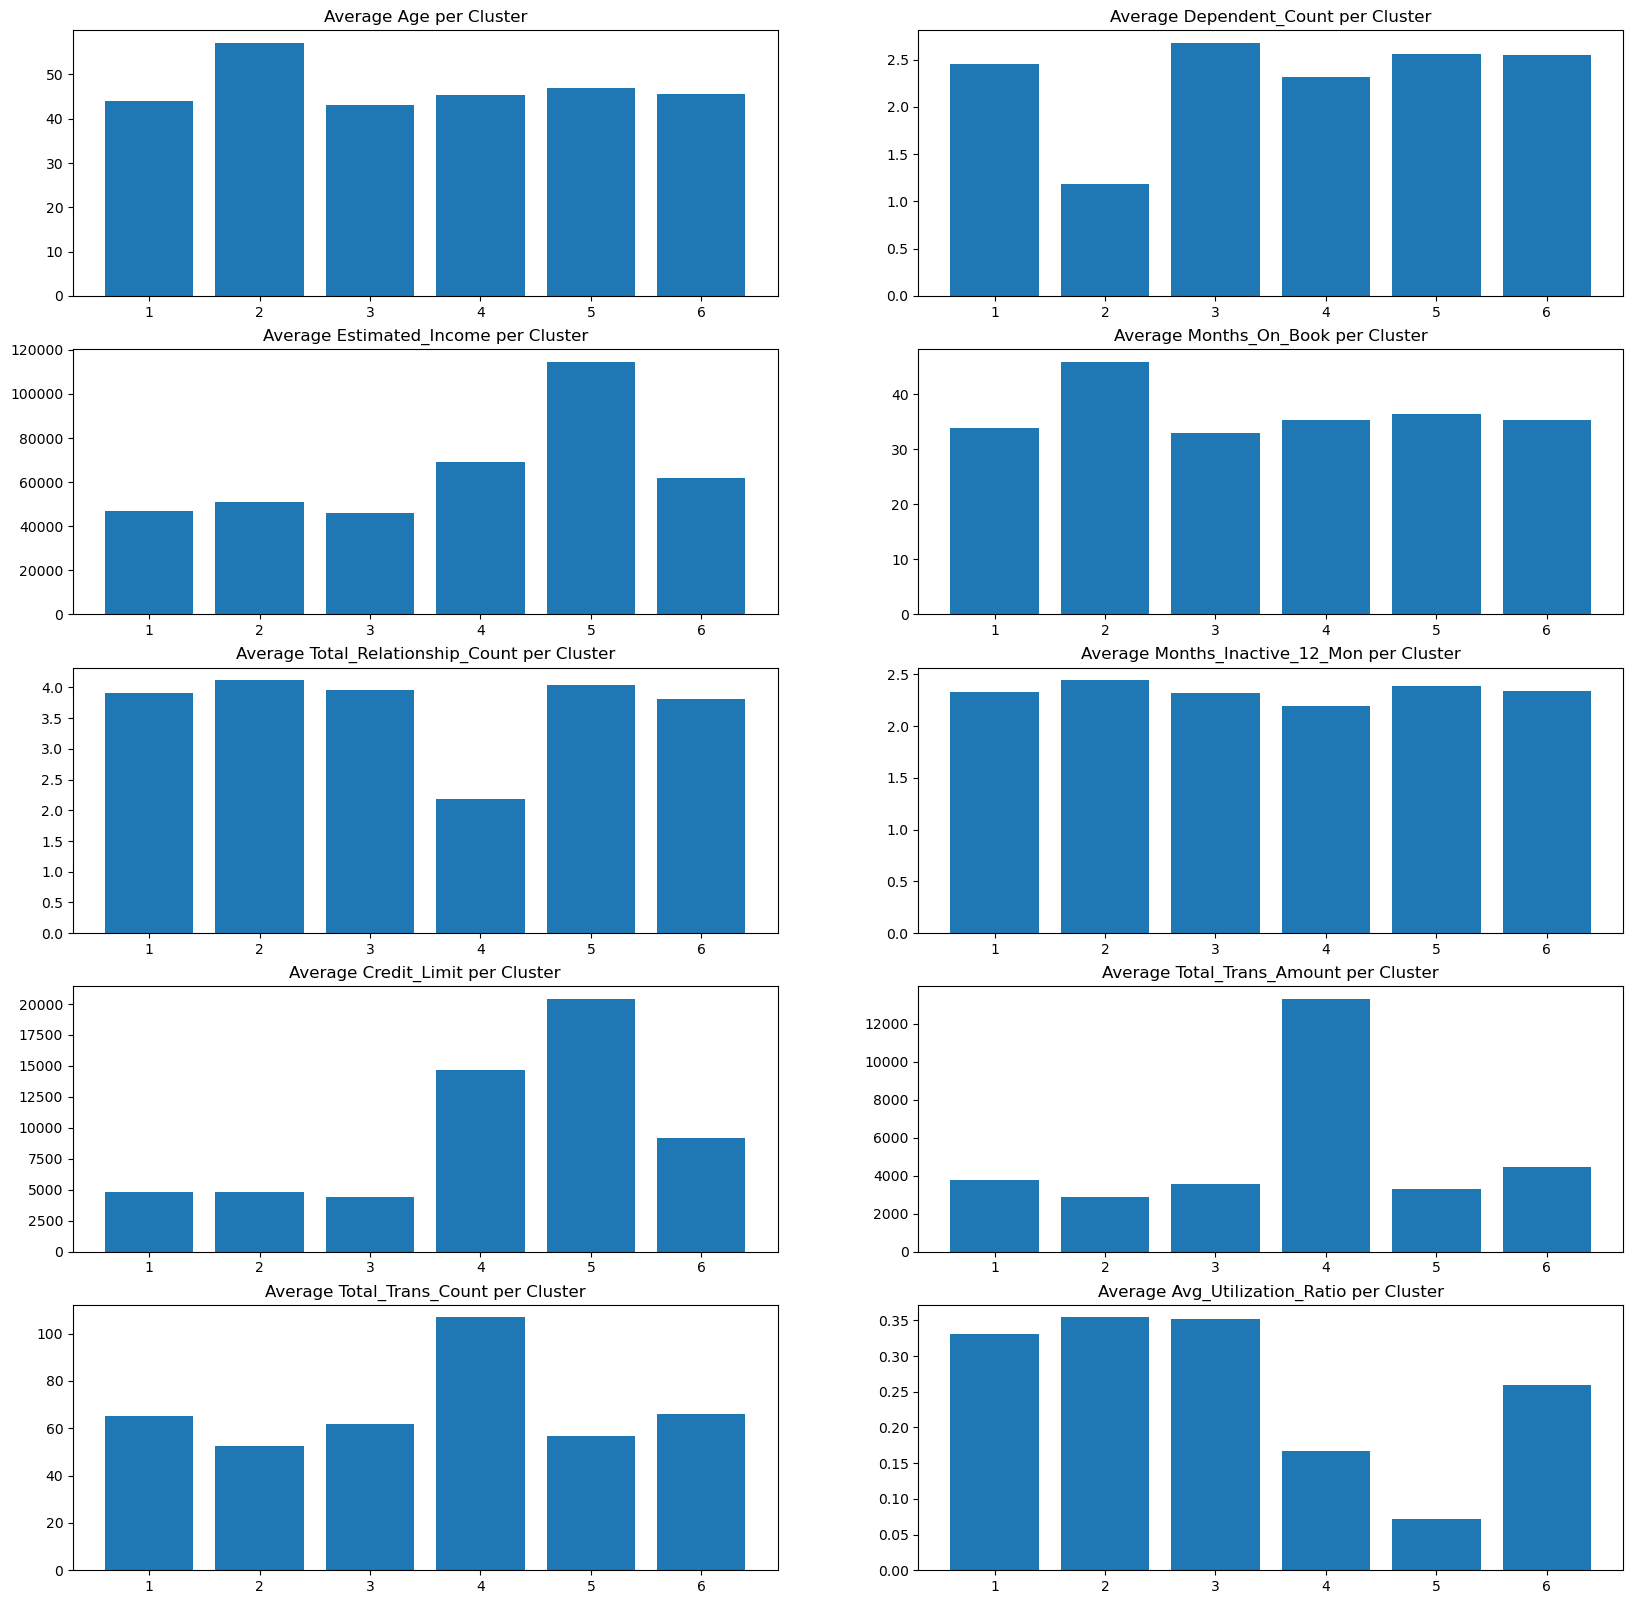

In [28]:
fig = plt.figure(figsize=(20,20))
for i, col in enumerate(numeric_cols):
    df_plot = dfc.groupby('clusters')[col].mean()
    ax = fig.add_subplot(5, 2, i+1)
    ax.bar(df_plot.index, df_plot)
    ax.set_title(f'Average {col.title()} per Cluster')
    ax.xaxis.grid(False)
plt.show()

For those numerical variables with higher correlations we saw earlier, we can also use a scatter plot to visualize this correlation grouped by clusters and analyze how the clusters change between each area of the chart.

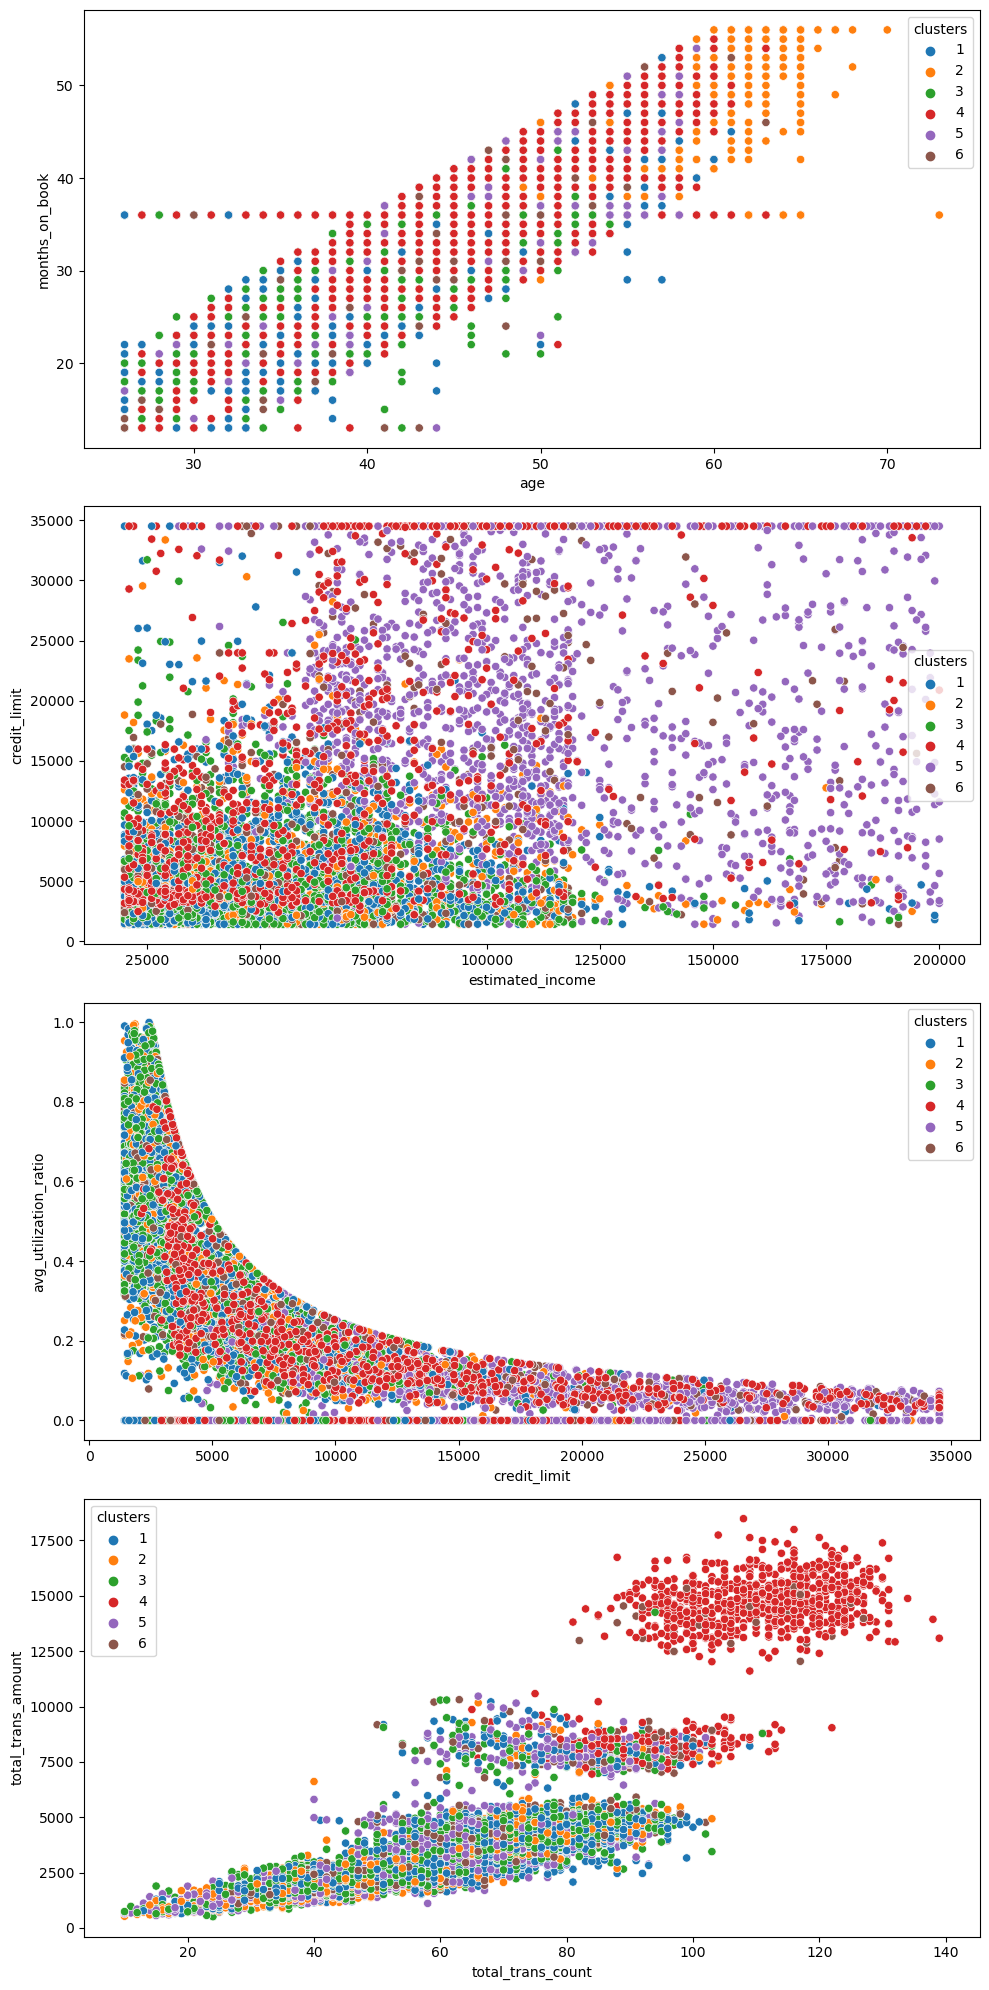

In [29]:
fig, ((ax1), (ax2), (ax3), (ax4)) = plt.subplots(4, 1, figsize=(10, 20))
sns.scatterplot(x='age', y='months_on_book', hue='clusters', data=dfc, palette='tab10', ax=ax1)
sns.scatterplot(x='estimated_income', y='credit_limit', hue='clusters', data=dfc, palette='tab10', ax=ax2)
sns.scatterplot(x='credit_limit', y='avg_utilization_ratio', hue='clusters', data=dfc, palette='tab10', ax=ax3)
sns.scatterplot(x='total_trans_count', y='total_trans_amount', hue='clusters', data=dfc, palette='tab10', ax=ax4)

plt.tight_layout()
plt.show()

We can draw some early conclusions considering only the numeric variables.

For the categorical columns, we'll plot the percentual distribution of each variable in each cluster. This will allow us to verify if a particular cluster is mostly composed of men, or of married people only, for example.

C:\Users\Olga\AppData\Local\Temp\ipykernel_11900\594187823.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)
C:\Users\Olga\AppData\Local\Temp\ipykernel_11900\594187823.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)
C:\Users\Olga\AppData\Local\Temp\ipykernel_11900\594187823.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


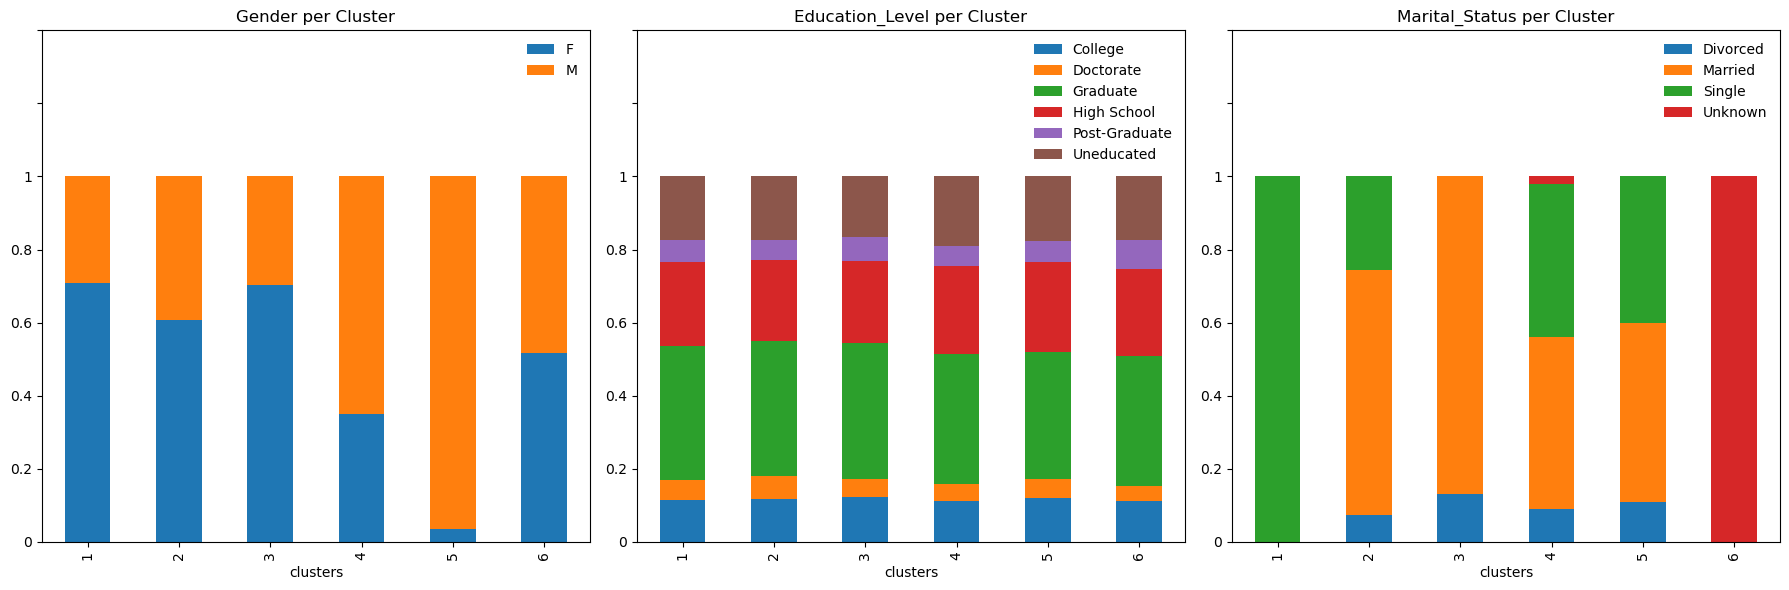

In [30]:
cat_columns = dfc.select_dtypes(include=['object'])

fig = plt.figure(figsize=(18,6))
for i, col in enumerate(cat_columns):
    plot_df = pd.crosstab(index=dfc['clusters'], columns=dfc[col], values=dfc[col], aggfunc='size', normalize='index')
    ax = fig.add_subplot(1,3,i+1)
    plot_df.plot.bar(stacked=True, ax=ax)
    ax.set_title(f'{col.title()} per Cluster')
    
    ax.set_ylim(0, 1.4)
    ax.legend(frameon=False)
    ax.xaxis.grid(False)
    
    labels = [0, 0.2, 0.4, 0.6, 0.8, 1]
    ax.set_yticklabels(labels)

plt.tight_layout()
plt.show()

The education level is well divided between clusters.
For other categorical variables distribution varies greatly among clusters

## Conclusion

As demanded by the company, we now have listed the most important characteristics of each cluster. We could also have some suggestions and insights into each one of them.

In the end, we have the list of customers with a cluster assigned to each one.

## Cluster 1
**Characteristics:** Mostly men; high credit limit; high amount transitioned; high number of transactions; low utilization rate.

**Insight:** People with high volume spent on the card, but do not use it on a daily basis. Could be incentivized to use it more often.

## Cluster 2
**Characteristics:** Mostly women; mostly married; low estimated income; low credit limit; low amount transitioned; high utilization rate.

**Insight:** Married people (majority women) with low income and limit but use the card too often. Could be given a bit more credit limit.

## Cluster 3
**Characteristics:** Gender well divided; low credit limit, high utilization rate; marital status 100% unknown; smaller cluster.

**Insight:** Men and women with low credit limits but use the card too often. Could be combined with Cluster 2.

## Cluster 4
**Characteristics:** Mostly men, mostly single and married, high estimated income, high credit limit; low amount transitioned; low utilization rate.

**Insight:** People (majority men) with high income and credit limits, but don't use the card. Could be incentivized to use it. Could have Cluster 1 (smaller) combined with it.

## Cluster 5
**Characteristics:** Mostly married, high age, low dependent count, long time customers, low credit limit, low amount transitioned, high utilization rate.

**Insight:** Older people and long-time customers. Low credit limit and transactions, but use the card very often. Could receive benefits to spend more money.

## Cluster 6
**Characteristics:** Mostly women; 100% single people, low estimated income, low credit limit, low amount transitioned, high utilization rate.

**Insight:** Single (mostly women) people that use their card a lot but have low credit limits and income. Could be given a bit more credit limit.